<a href="https://colab.research.google.com/github/lalitpandey02/PythonNotebooks/blob/main/movies_and_tv_shows_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-warning">  
<h1><strong>🍿Movies and TV shows on streaming platforms</strong></h1>
    <h4>During the pandemic,the popularity of streaming platforms has soared immensely📈 <br><br>
    Embracing the new normal,here's an EDA of the same.</h4>
</div>

<div>
<img src="https://cdn.technadu.com/wp-content/uploads/2020/04/Netflix-Amazon-Prime-Hulu-Disney-Plus-Logos.png" width="550"/>
</div>

<div class="alert alert-info">  
<h3><strong>Imports</strong></h3>
</div>

In [ ]:
# pip install colorama

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

<div class="alert alert-info">  
<h3><strong>Custom Color Palette</strong></h3>
</div>

In [ ]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

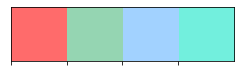

In [ ]:
sns.palplot(sns.color_palette(custom_colors),size=1)

> <h3>Netflix</h3>

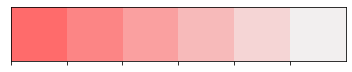

In [ ]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

> <h3>Hulu</h3>

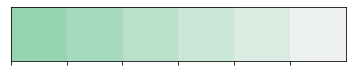

In [ ]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

> <h3>Prime Video</h3>

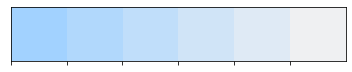

In [ ]:
prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

> <h3>Disney+</h3>

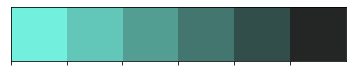

In [ ]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

<div class="alert alert-info">  
<h3><strong>Loading the dataset and displaying rows</strong></h3>
</div>

In [ ]:
df_tv = pd.read_csv('../input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv')
df_movies = pd.read_csv('../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv')

FileNotFoundError: ignored

In [ ]:
df_tv = df_tv.drop(['Unnamed: 0'], axis = 1) 
df_tv.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [ ]:
df_movies = df_movies.drop(['Unnamed: 0','ID'], axis = 1) 
df_movies.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


<h3> Number of unique directors for movies </h3>

In [ ]:
len(df_movies['Directors'].unique())

6618

<h3>Number of unique genres for movies </h3>

In [ ]:
len(df_movies['Genres'].unique())

1419

<div class="alert alert-info">  
<h3><strong>Feature generation</strong></h3>
</div>

In [ ]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [ ]:
m_genres = splitting(df_movies,'Genres')
m_lang = splitting(df_movies,'Language')

Done!
Done!


<div class="alert alert-info">  
<h3><strong>TV shows and Movies per platform</strong></h3>
</div>

In [ ]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [ ]:
val_counts = []
dfs = [df_movies,df_tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [ ]:
val_counts

[3695, 1047, 4113, 922, 1971, 1621, 1831, 351]

In [ ]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

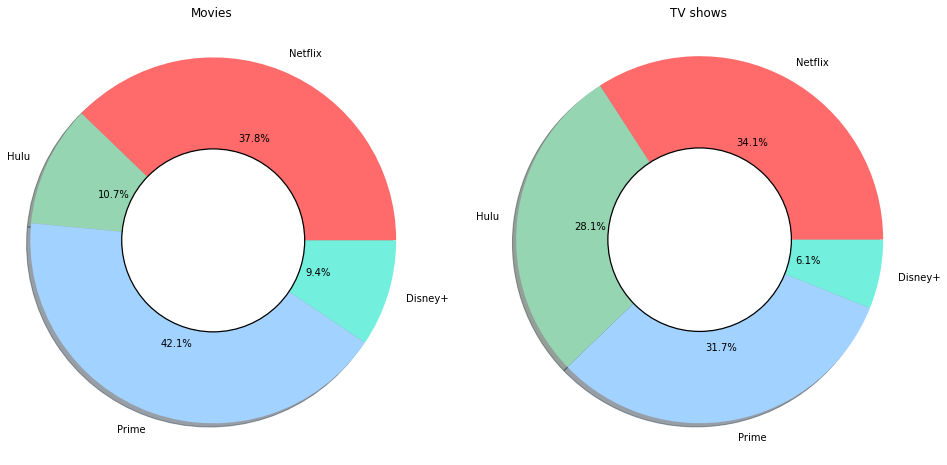

In [ ]:
fig = plt.subplots(figsize=(16, 8))
labels = 'Netflix', 'Hulu','Prime','Disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
sizes2 = [val_counts[4], val_counts[5],val_counts[6],val_counts[7]]
colors = custom_colors
explode = (0, 0, 0, 0) 

donut(121,df_movies,sizes1,'Movies')
donut(122,df_tv,sizes2,'TV shows')
plt.show()

<div>  
<h4><strong>📌 Prime has the maximum number of movies and Netflix has the maximum number of tv shows!</strong></h4>
</div>

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
    mode = "number",
    value = 4113,
    number={'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movies<br><span style='font-size:0.8em;color:gray'>On Prime Video</span>"},
    domain = {'x': [0, 0.5], 'y': [0.6, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = 1971,
    number={'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Shows<br><span style='font-size:0.8em;color:gray'>On Netflix</span>"},
    domain = {'x': [0.5, 1], 'y': [0, 0.4]}))

fig.show()

<div class="alert alert-info">  
<h3><strong>Movies with the highest IMDb rating on each platform and genres</strong></h3>
</div>

In [ ]:
df_movies['IMDb'] = df_movies['IMDb'].str.split('/').str[0]
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].str.split('/').str[0]
df_tv['IMDb'] = df_tv['IMDb'].str.split('/').str[0]
df_tv['Rotten Tomatoes'] = df_tv['Rotten Tomatoes'].str.split('/').str[0]

In [ ]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()

In [ ]:
sunburst(df_movies,'Netflix','amp')

In [ ]:
sunburst(df_movies,'Hulu','Blugrn')

In [ ]:
sunburst(df_movies,'Prime Video','haline')

In [ ]:
sunburst(df_movies,'Disney+','dense')

<div class="alert alert-info">  
<h3><strong>Distribution of runtime and release year of movies</strong></h3>
</div>

In [ ]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=custom_colors[c],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=custom_colors[c],shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15);

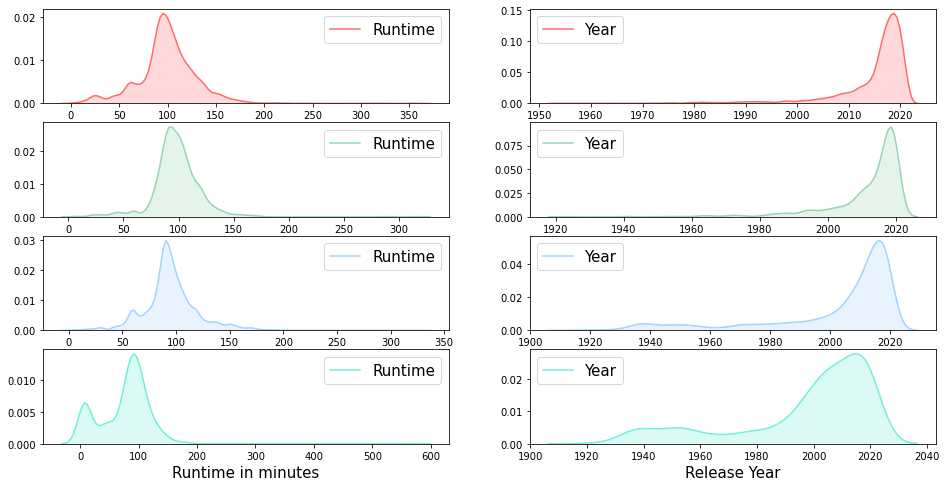

In [ ]:
plt.figure(figsize = (16, 8))

kde(421,df_movies,'Netflix',0)
kde(423,df_movies,'Hulu',1)
kde(425,df_movies,'Prime Video',2)
kde(427,df_movies,'Disney+',3)

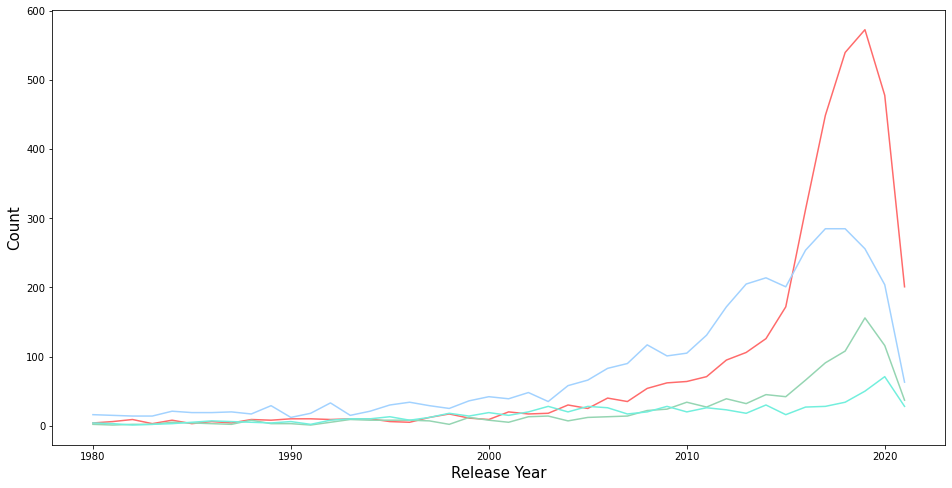

In [ ]:
post_1980 = df_movies[df_movies.Year >= 1980]
year_movies = post_1980.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movies.index,y=year_movies['Netflix'])
sns.lineplot(x=year_movies.index,y=year_movies['Hulu'])
sns.lineplot(x=year_movies.index,y=year_movies['Prime Video'])
sns.lineplot(x=year_movies.index,y=year_movies['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<div class="alert alert-info">  
<h3><strong>TV shows with minimum age requirement on each platform</strong></h3>
</div>

In [ ]:
df_t = df_tv.copy()
df_t = df_t[df_t['Age'].notna()]

In [ ]:
df_t['Age']=df_t['Age'].str.replace('+','')
df_t['Age']=df_t['Age'].str.replace('all','0')
df_t['Age']=df_t['Age'].astype(str).astype(int)

In [ ]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)

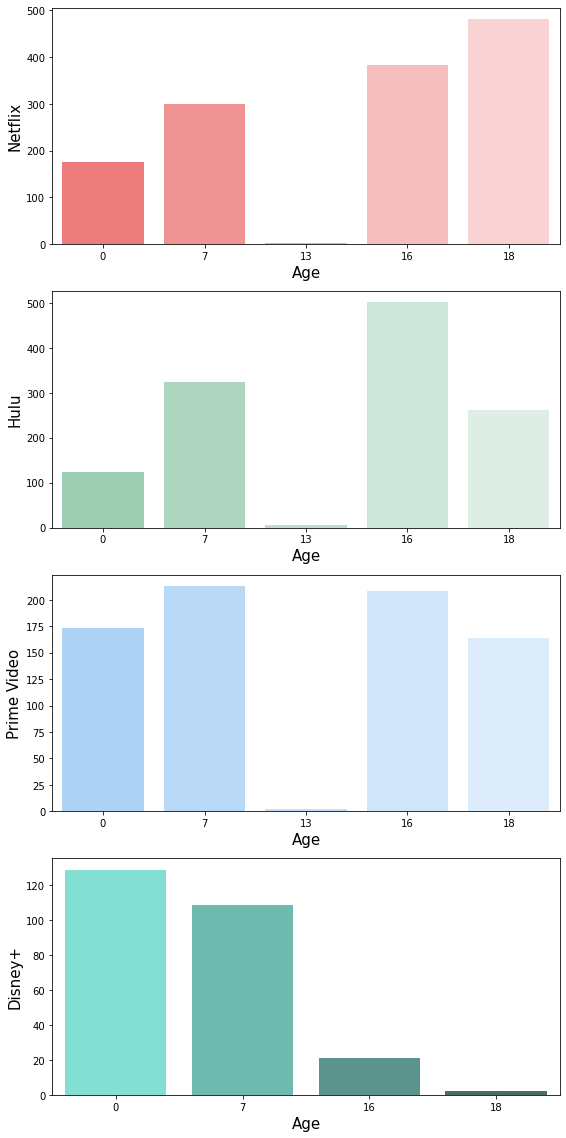

In [ ]:
plt.figure(figsize = (20, 20))

barplot(421,df_t,'Netflix',netflix_p)
barplot(423,df_t,'Hulu',hulu_p)
barplot(425,df_t,'Prime Video',prime_p)
barplot(427,df_t,'Disney+',disney_p)

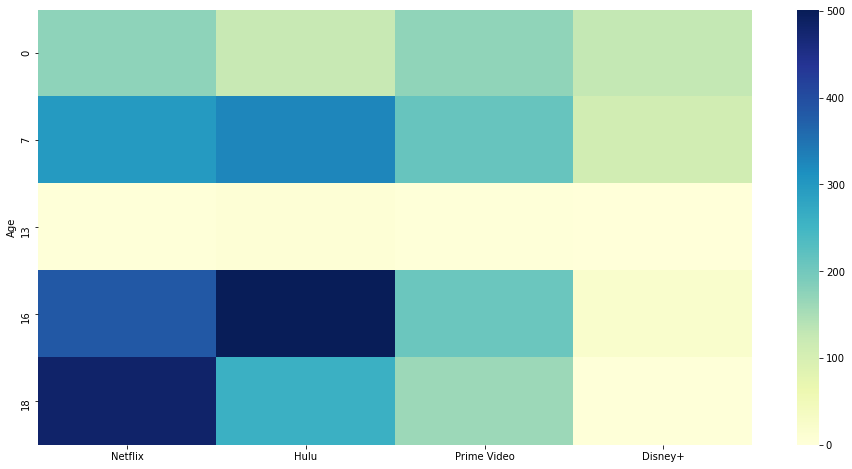

In [ ]:
plt.figure(figsize = (16, 8))
tv_age = df_t.groupby('Age')[['Netflix','Hulu','Prime Video','Disney+']].sum()
sns.heatmap(tv_age,cmap="YlGnBu")
plt.show()

<div class="alert alert-info">  
<h3><strong>TV shows with the highest IMDb rating vs availability</strong></h3>
</div>

In [ ]:
r = df_tv.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+']]
r['IMDb'] = r['IMDb'].astype(float)

In [ ]:
r.style.bar(subset=["Netflix"], color='#ff6b6b')\
.bar(subset=["Hulu"], color='#95d5b2')\
.bar(subset=["Prime Video"], color='#a2d2ff')\
.bar(subset=["Disney+"], color='#72efdd')\
.bar(subset=["IMDb"], color='#').background_gradient(cmap='Purples')

,Title,IMDb,Netflix,Hulu,Prime Video,Disney+
3802,The Secret World of Nature: Spain,9.600000,0,0,1,0
5077,Bluey,9.600000,0,0,0,1
3611,Malgudi Days,9.500000,0,0,1,0
0,Breaking Bad,9.400000,1,0,0,0
5277,Alaska Animal Rescue,9.400000,0,0,0,1
80,Our Planet,9.300000,1,0,0,0
3115,Hungry Henry,9.300000,0,1,0,0
3760,Everyday Driver,9.300000,0,0,1,0
2009,Cosmos,9.300000,0,1,1,1
5,Avatar: The Last Airbender,9.300000,1,0,1,0


<div class="alert alert-info">  
<h3><strong>Movies with the highest IMDb rating, genres and languages</strong></h3>
</div>

In [ ]:
r1 = df_movies.sort_values(by='IMDb', ascending=False)
r1 = r1[0:10]
r1['Movies']='Movies'
fig = px.treemap(r1, path=['Movies','Title', 'Genres','Language'], values='IMDb',color='IMDb',color_continuous_scale='Purp')
fig.show()

<div class="alert alert-info">  
<h3><strong>Movies with the highest Rotten Tomatoes rating vs directors</strong></h3>
</div>

In [ ]:
df_m = df_movies.copy()
df_m = df_m.dropna()

df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].str.replace('%','')
df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].astype(str).astype(int)
df_m['Directors']=df_m['Directors'].astype('str')

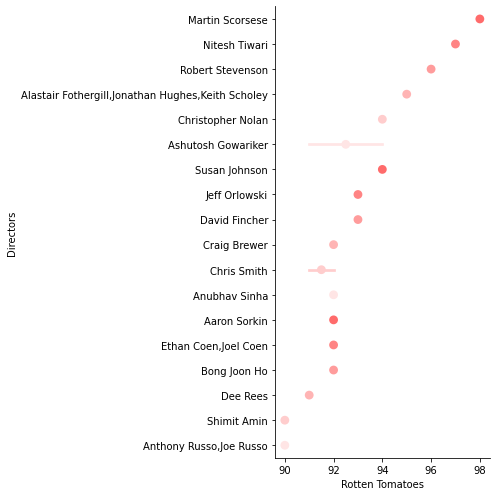

In [ ]:
df_m=df_m.sort_values(by='Rotten Tomatoes', ascending=False)
rating = df_m[0:20]
sns.catplot(x="Rotten Tomatoes", y="Directors",data=rating, palette=netflix_p,height=7,kind="point");

<div class="alert alert-info">  
<h3><strong>Distribution of IMDb and Rotten Tomatoes ratings of movies on all platforms</strong></h3>
</div>

In [ ]:
def dist(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.distplot(dataframe['IMDb'], color=custom_colors[c],vertical=True)
    
    plt.ylabel('IMDb rating, '+platform, fontsize = 15)
    plt.subplot(i+1)
    sns.distplot(dataframe['Rotten Tomatoes'], color=custom_colors[c],vertical=True)
    plt.ylabel('Rotten Tomatoes, '+platform, fontsize = 15)

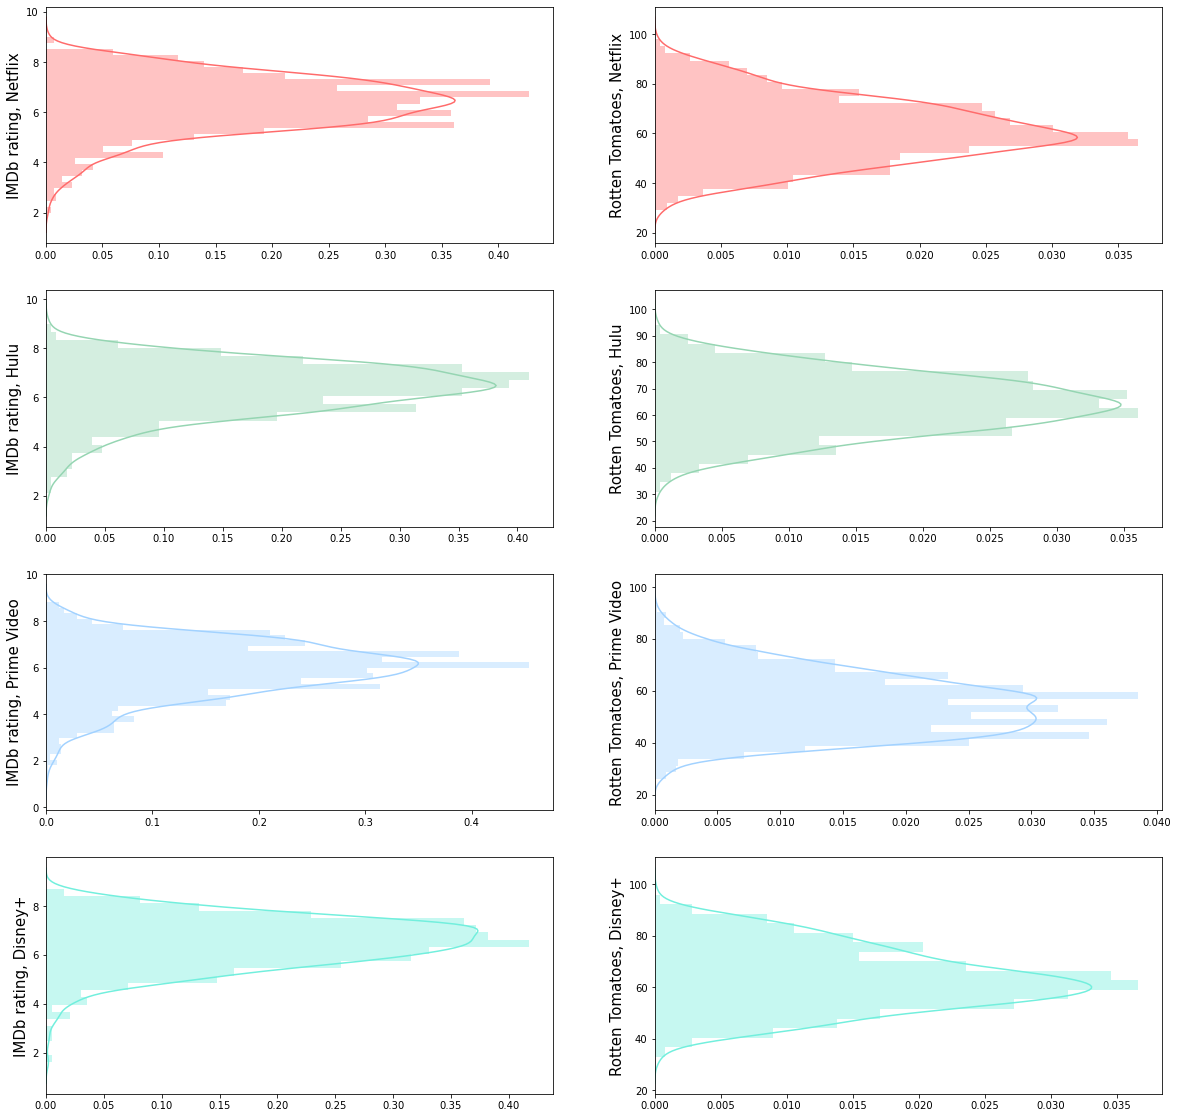

In [ ]:
plt.figure(figsize = (20, 20))

dist(421,df_m,'Netflix',0)
dist(423,df_m,'Hulu',1)
dist(425,df_m,'Prime Video',2)
dist(427,df_m,'Disney+',3)

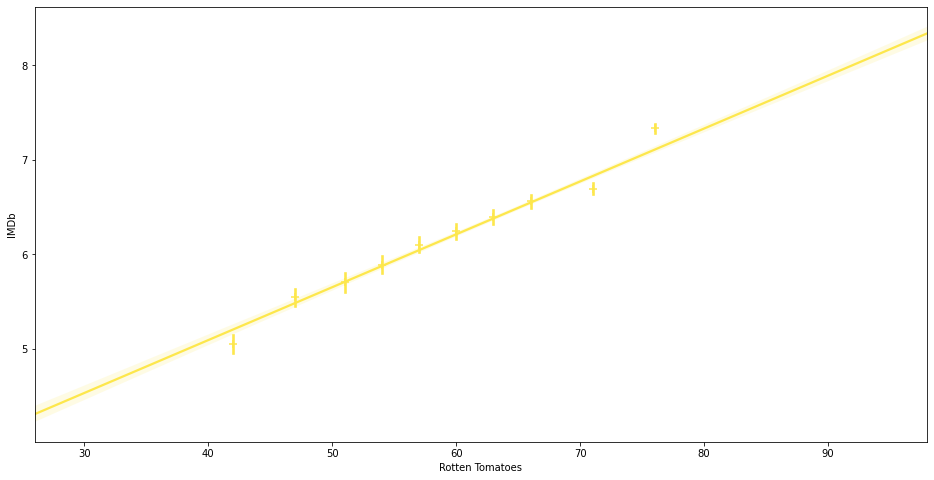

In [ ]:
df_m['Rotten Tomatoes'] = df_m['Rotten Tomatoes'].astype(float)
df_m['IMDb'] = df_m['IMDb'].astype(float)

plt.figure(figsize = (16, 8))
sns.regplot(x = df_m['Rotten Tomatoes'],y = df_m['IMDb'],x_bins=10,marker="+",color="#FDE74C")
plt.show()

<div class="alert alert-info">  
<h3><strong>Languages and genres of movies on all platforms</strong></h3>
</div>

In [ ]:
df_l_merged = pd.concat([df_movies, m_lang], axis = 1, sort = False)
df_g_merged = pd.concat([df_movies, m_genres], axis = 1, sort = False)

In [ ]:
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies'])
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

<div>
<img src="https://download.logo.wine/logo/Netflix/Netflix-Logo.wine.png" width="350"/>
</div>

In [ ]:
bar(df_l_merged,'Netflix','#ff6b6b')

,Number of movies
English,2266
Hindi,380
Spanish,377
French,223
Arabic,133
German,117
Japanese,111
Italian,85
Mandarin,83
Tamil,70


In [ ]:
bar(df_g_merged,'Netflix','#ff6b6b')

,Number of movies
Drama,1679
Comedy,1473
Thriller,709
Romance,638
Action,614
Documentary,452
Crime,448
Adventure,362
Family,357
Mystery,273


<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Hulu_Logo.svg/1200px-Hulu_Logo.svg.png" width="300"/>
</div>

In [ ]:
bar(df_l_merged,'Hulu','#95d5b2')

,Number of movies
English,956
Spanish,74
French,71
German,48
Japanese,35
Italian,32
Russian,30
Korean,22
Mandarin,21
Swedish,15


In [ ]:
bar(df_g_merged,'Hulu','#95d5b2')

,Number of movies
Drama,509
Comedy,330
Thriller,275
Romance,189
Action,186
Horror,159
Documentary,145
Adventure,140
Crime,130
Sci-Fi,116



<div>
    
<img src="https://logodownload.org/wp-content/uploads/2018/07/prime-video.png" width="300"/>
</div>

In [ ]:
bar(df_l_merged,'Prime Video','#a2d2ff')

,Number of movies
English,3437
Spanish,195
French,184
Hindi,181
German,118
Italian,99
Russian,64
Telugu,59
Mandarin,58
Tamil,53


In [ ]:
bar(df_g_merged,'Prime Video','#a2d2ff')

,Number of movies
Drama,1917
Comedy,1251
Thriller,943
Romance,753
Action,712
Crime,554
Horror,462
Documentary,454
Adventure,388
Mystery,347


<div>
<img src="https://download.logo.wine/logo/Disney%2B/Disney%2B-Logo.wine.png" width="350"/>
</div>

In [ ]:
bar(df_l_merged,'Disney+','#72efdd')

,Number of movies
English,866
French,43
Spanish,34
German,27
Italian,15
Japanese,12
Mandarin,12
None,10
Norwegian,8
Arabic,7


In [ ]:
bar(df_g_merged,'Disney+','#72efdd')

,Number of movies
Family,645
Comedy,471
Adventure,356
Animation,328
Fantasy,264
Drama,221
Short,180
Documentary,130
Action,125
Sci-Fi,121
